In [1]:
#Internship project- Data Science(Level1)
#Intern: Ashish Kumar Regar
#Organization: Cognifyz Technologies


#Task 3: Geospatial_Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


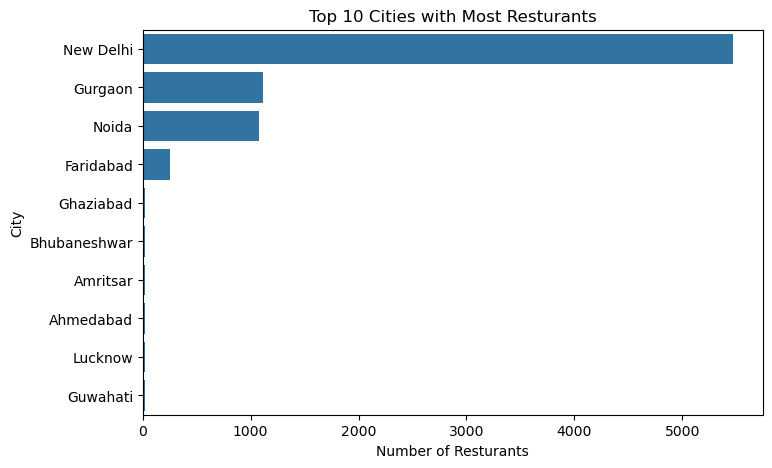

In [9]:
city_counts = df['City'].value_counts().head(10)
print(city_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=city_counts.values,y=city_counts.index)
plt.title("Top 10 Cities with Most Resturants")
plt.xlabel("Number of Resturants")
plt.ylabel("City")
plt.show()

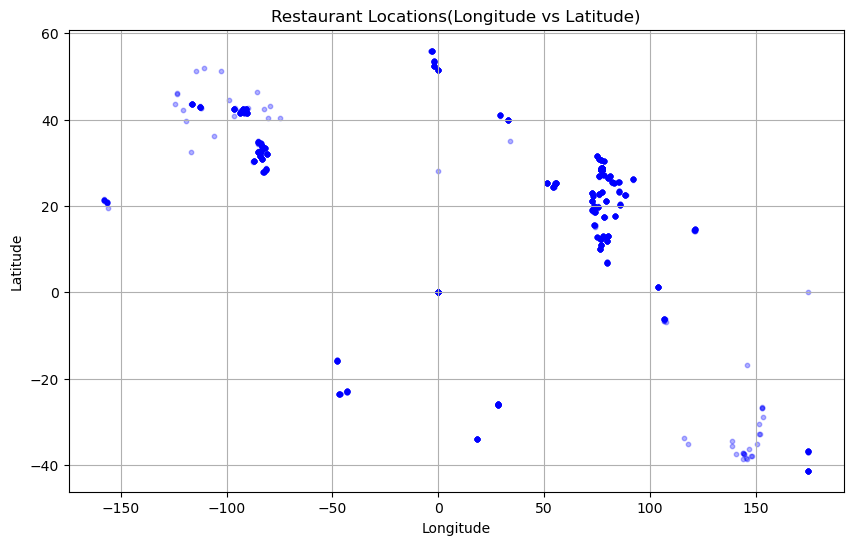

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'],df['Latitude'],alpha=0.3, c='blue',s=10)
plt.title("Restaurant Locations(Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

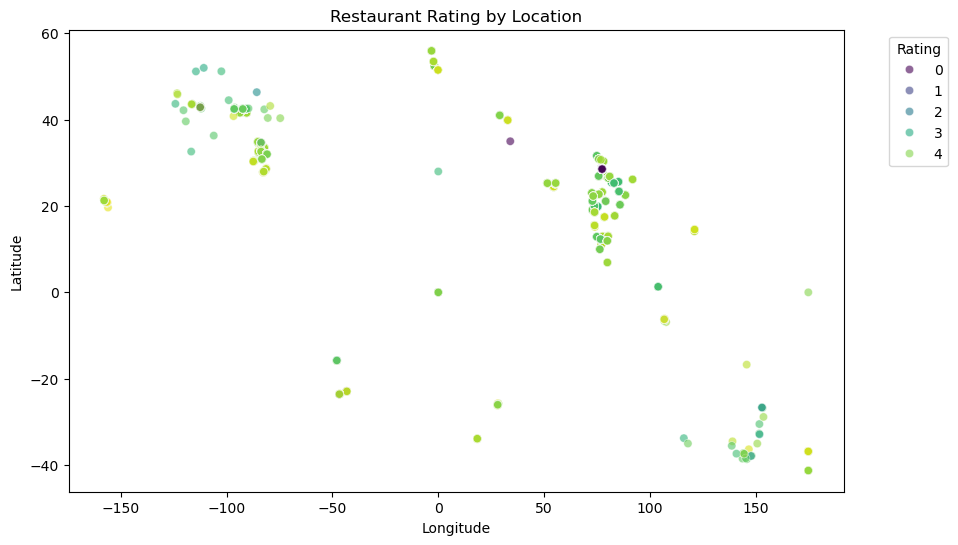

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', alpha=0.6)
plt.title("Restaurant Rating by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [7]:
!pip install folium

In [15]:
import folium

In [17]:
from IPython.display import IFrame
IFrame('resturant_map.html', width=700, height=500)
map1 = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
for index, row in df.head(100).iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=2,
                        popup=row.get('Restaurant Name', 'N/A'),
                        color='red',
                        fill=True).add_to(map1)



map1.save("resturant_map.html")
print("Folium map saved as 'restaurant_map.html'. Open it in a browser to view the map.")

Folium map saved as 'restaurant_map.html'. Open it in a browser to view the map.


In [43]:
print(df[['Latitude', 'Longitude']].isnull().sum())

Latitude     0
Longitude    0
dtype: int64
